# Generate results comparing linear regression and geodesic regression between $q^{\text{ref}}$ and $q$

In [1]:
COL_TO_TEXT = {
    "diff_seq_per_time_vertex_diameter": "Mesh distance per vertex [% diameter]",
    "diff_seq_duration_per_time_and_vertex": "Time difference [secs] per mesh and vertex",
    "relative_diff_seq_duration": "Time difference per vertex [% line]",
    "noise_factor": "Deformation factor, Steps",
    "n_steps": "Number of steps",
    "n_vertices": "Number of vertices",
}

In [1]:
import numpy as np
import pandas as pd

# Load real and synthetic run tables

We load the .csv that corresponds to the wandb Table downloaded from:

https://wandb.ai/bioshape-lab/my28brains-my28brains/table?workspace=user-adelemyers

(note, we have added filters: `use_parka` = `false`, and `full_run` = `null` or `true`)

In [2]:
synthetic_df = pd.read_csv("synthetic_linear_vs_geodesic_regression.csv")
synthetic_df.head()

,Name,State,Notes,User,Tags,Created,Runtime,dataset_name,end_shape,euclidean_subspace,...,geodesic_duration_time,geodesic_intercept_err,geodesic_tol,linear_coef_err,linear_duration_time,linear_intercept_err,mesh_diameter,ellipse_ratio_h_v,n_faces,test_diff_tolerance
0,run_iefgn7q3,finished,-,adelemyers,NaN,2023-07-07T18:04:44.000Z,575,synthetic,ellipsoid,False,...,432.098236,5.656766e-09,4.306538e+14,1.211099e-08,260.524600,5.656766e-09,1620000.0,0.666667,5120.0,1620.0
1,run_ijkw50rh,finished,-,adelemyers,NaN,2023-07-07T17:56:38.000Z,423,synthetic,ellipsoid,False,...,262.057967,3.411245e+03,3.004676e+10,2.456509e+04,112.852549,3.411245e+03,54000.0,5.000000,1280.0,54.0
2,run_ctkcg2xc,finished,-,adelemyers,NaN,2023-07-07T17:48:49.000Z,467,synthetic,ellipsoid,False,...,314.177742,3.386882e+03,3.004676e+10,1.693441e+04,174.833930,3.386882e+03,54000.0,0.200000,1280.0,54.0
3,run_nwkqq7oh,finished,-,adelemyers,NaN,2023-07-07T17:39:57.000Z,530,synthetic,ellipsoid,False,...,347.132451,8.633496e-11,3.004676e+10,1.980528e-10,174.721431,8.633496e-11,54000.0,0.666667,1280.0,54.0
4,run_wxl5wxwq,finished,-,adelemyers,NaN,2023-07-07T17:34:14.000Z,315,synthetic,ellipsoid,False,...,239.858614,3.450211e+03,2.125764e+06,4.644987e+04,176.224559,3.450211e+03,1800.0,5.000000,320.0,1.8


In [4]:
real_df = pd.read_csv("real_linear_vs_geodesic_regression.csv")
real_df.head()

,Name,State,Notes,User,Tags,Created,Runtime,dataset_name,end_shape,euclidean_subspace,...,geodesic_duration_time,geodesic_intercept_err,geodesic_tol,linear_coef_err,linear_duration_time,linear_intercept_err,mesh_diameter,ellipse_ratio_h_v,n_faces,test_diff_tolerance
0,run_iefgn7q3,finished,-,adelemyers,NaN,2023-07-07T18:04:44.000Z,575,synthetic,ellipsoid,False,...,432.098236,5.656766e-09,4.306538e+14,1.211099e-08,260.524600,5.656766e-09,1620000.0,0.666667,5120.0,1620.0
1,run_ijkw50rh,finished,-,adelemyers,NaN,2023-07-07T17:56:38.000Z,423,synthetic,ellipsoid,False,...,262.057967,3.411245e+03,3.004676e+10,2.456509e+04,112.852549,3.411245e+03,54000.0,5.000000,1280.0,54.0
2,run_ctkcg2xc,finished,-,adelemyers,NaN,2023-07-07T17:48:49.000Z,467,synthetic,ellipsoid,False,...,314.177742,3.386882e+03,3.004676e+10,1.693441e+04,174.833930,3.386882e+03,54000.0,0.200000,1280.0,54.0
3,run_nwkqq7oh,finished,-,adelemyers,NaN,2023-07-07T17:39:57.000Z,530,synthetic,ellipsoid,False,...,347.132451,8.633496e-11,3.004676e+10,1.980528e-10,174.721431,8.633496e-11,54000.0,0.666667,1280.0,54.0
4,run_wxl5wxwq,finished,-,adelemyers,NaN,2023-07-07T17:34:14.000Z,315,synthetic,ellipsoid,False,...,239.858614,3.450211e+03,2.125764e+06,4.644987e+04,176.224559,3.450211e+03,1800.0,5.000000,320.0,1.8


The columns of the dataframe corresponding to the .csv are the variables that we have logged into wandb:

In [6]:
real_df.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime',
       'dataset_name', 'end_shape', 'euclidean_subspace', 'full_run',
       'use_parka', 'geodesic_initialization', 'geodesic_residuals', 'n_X',
       'noise_factor', 'sped_up', 'start_shape', 'ellipsoid_dims',
       'n_steps', 'n_subdivisions', 'tol_factor',
       'euclidean_subspace_via_diffs', 'euclidean_subspace_via_ratio',
       'geodesic_coef_err', 'geodesic_duration_time', 'geodesic_intercept_err',
       'geodesic_tol', 'linear_coef_err', 'linear_duration_time',
       'linear_intercept_err', 'mesh_diameter', 'ellipse_ratio_h_v', 'n_faces',
       'test_diff_tolerance'],
      dtype='object')

# Save linear and geodesic mesh arrays
## - NOTE: run this on frank for synthetic data, run on parka for real data!!!

## Synthetic - Run on Frank

In [34]:
import os
import json
import numpy as np

wandb_path = "/home/adele/code/my28brains/wandb"

output_folder = (
    "/home/adele/code/my28brains/src/notebooks/synthetic_mesh_vertices_arrays"
)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

run_folders = [folder for folder in os.listdir(wandb_path) if folder.startswith("run-")]

for run_folder in run_folders:
    run_name = run_folder.split("-")[-1]
    run_path = os.path.join(wandb_path, run_folder)
    media_folder_path = os.path.join(run_path, "files", "media", "object3D")

    if os.path.exists(media_folder_path):
        for file in os.listdir(media_folder_path):
            if file.endswith(".pts.json"):
                file_path = os.path.join(media_folder_path, file)
                file_prefix, _ = file.rsplit("_", 1)
                output_filename = f"{file_prefix}_{run_name}.npy"
                output_file_path = os.path.join(output_folder, output_file_name)

                try:
                    with open(file_path, "r") as f:
                        data = json.load(f)
                        np_array = np.array(data)

                    np.save(output_file_path, np_array)
                    print(f"Saved array: {output_file_name}")
                except Exception as e:
                    print(f"Error processing file: {file}. {type(e).__name__}")

print("Extraction completed.")

Saved array: true_intercept_1_fp2aovx5.npy
Saved array: geodesic_coef_hat_2_fp2aovx5.npy
Saved array: true_coef_1_fp2aovx5.npy
Saved array: geodesic_intercept_hat_2_fp2aovx5.npy
Saved array: linear_coef_hat_1_fp2aovx5.npy
Saved array: offset_mesh_sequence_vertices_1_fp2aovx5.npy
Saved array: linear_intercept_hat_1_fp2aovx5.npy
Saved array: linear_coef_hat_1_8p02t2ry.npy
Saved array: true_intercept_1_8p02t2ry.npy
Saved array: geodesic_intercept_hat_2_8p02t2ry.npy
Saved array: geodesic_coef_hat_2_8p02t2ry.npy
Saved array: true_coef_1_8p02t2ry.npy
Saved array: linear_intercept_hat_1_8p02t2ry.npy
Saved array: offset_mesh_sequence_vertices_1_8p02t2ry.npy
Saved array: true_coef_1_cwkipdot.npy
Saved array: true_intercept_1_cwkipdot.npy
Saved array: geodesic_coef_hat_2_cwkipdot.npy
Saved array: linear_intercept_hat_1_cwkipdot.npy
Saved array: linear_coef_hat_1_cwkipdot.npy
Saved array: geodesic_intercept_hat_2_cwkipdot.npy
Saved array: offset_mesh_sequence_vertices_1_cwkipdot.npy
Saved array: 

## Test to see whether synthetic data is load-able

In [19]:
import os
import numpy as np

output_folder = (
    "/home/adele/code/my28brains/src/notebooks/real_mesh_vertices_arrays"
)

output_files = os.listdir(output_folder)

for file in output_files:
    file_path = os.path.join(output_folder, file)
    if file.endswith(".npy"):
        try:
            loaded_array = np.load(file_path)
            print(f"Loaded array from {file}:")
            print(loaded_array)
        except Exception as e:
            print(f"Error loading array from {file}: {type(e).__name__}")

print("Loading completed.")

Loaded array from meshes_along_geodesic_regression_2_2f6cdaf0.npy:
[[ 0.51306722 -1.10263949 -1.5489966 ]
 [ 0.4573858  -1.20089911 -1.5286128 ]
 [ 0.52223938 -0.89038309 -1.5302016 ]
 ...
 [ 0.31148242  0.24072095  1.44527645]
 [-0.45146065  1.3604421   1.57298893]
 [ 0.29013778  0.10780156  1.40819278]]
Loaded array from mesh_sequence_vertices_1_nwkqq7oh.npy:
[[-14194.74002722  22967.57182551      0.        ]
 [ 14194.74002722  22967.57182551      0.        ]
 [-14194.74002722 -22967.57182551      0.        ]
 ...
 [ -4930.10546183  -2157.87807919  -1333.64199652]
 [ -5218.52002597   -717.07937487  -3565.89584507]
 [ -5204.85082273  -1438.58538613      0.        ]]
Loaded array from linear_intercept_hat_1_rclogotf.npy:
[[-1.57719334e+01  2.55195243e+01 -3.28579451e-20]
 [ 1.57719334e+01  2.55195243e+01  5.70069230e-21]
 [-1.57719334e+01 -2.55195243e+01 -2.51938524e-20]
 [ 1.57719334e+01 -2.55195243e+01 -1.48536939e-19]
 [ 8.31568033e-21 -1.57719334e+01  2.55195243e+01]
 [-8.25583571e

## Real Data - Run on Parka

In [18]:
import os
import json
import numpy as np

wandb_path = "/home/adele/code/my28brains/wandb"

output_folder = (
    "/home/adele/code/my28brains/src/notebooks/real_mesh_vertices_arrays"
)

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

run_folders = [folder for folder in os.listdir(wandb_path) if folder.startswith("run-")]

for run_folder in run_folders:
    run_name = run_folder.split("-")[-1]
    run_path = os.path.join(wandb_path, run_folder)
    media_folder_path = os.path.join(run_path, "files", "media", "object3D")

    if os.path.exists(media_folder_path):
        for file in os.listdir(media_folder_path):
            if file.endswith(".pts.json"):
                file_path = os.path.join(media_folder_path, file)
                file_prefix, _ = file.rsplit("_", 1)
                output_filename = f"{file_prefix}_{run_name}.npy"
                output_file_path = os.path.join(output_folder, output_file_name)

                try:
                    with open(file_path, "r") as f:
                        data = json.load(f)
                        np_array = np.array(data)

                    np.save(output_file_path, np_array)
                    print(f"Saved array: {output_file_name}")
                except Exception as e:
                    print(f"Error processing file: {file}. {type(e).__name__}")

print("Extraction completed.")

Saved array: meshes_along_geodesic_regression_3_imzzaxdo.npy
Saved array: linear_coef_hat_2_imzzaxdo.npy
Saved array: geodesic_intercept_hat_3_imzzaxdo.npy
Saved array: mesh_sequence_vertices_1_imzzaxdo.npy
Saved array: geodesic_coef_hat_3_imzzaxdo.npy
Saved array: linear_intercept_hat_2_imzzaxdo.npy
Saved array: true_coef_2_imzzaxdo.npy
Saved array: offset_mesh_sequence_vertices_2_imzzaxdo.npy
Saved array: true_intercept_2_imzzaxdo.npy
Saved array: meshes_along_linear_regression_2_imzzaxdo.npy
Saved array: true_coef_1_rocysg60.npy
Saved array: linear_intercept_hat_1_rocysg60.npy
Saved array: linear_coef_hat_1_rocysg60.npy
Saved array: true_intercept_1_rocysg60.npy
Saved array: offset_mesh_sequence_vertices_1_rocysg60.npy
Saved array: geodesic_coef_hat_3_e46cukz3.npy
Saved array: geodesic_intercept_hat_3_e46cukz3.npy
Saved array: true_coef_2_e46cukz3.npy
Saved array: linear_intercept_hat_2_e46cukz3.npy
Saved array: mesh_sequence_vertices_1_e46cukz3.npy
Saved array: offset_mesh_sequence

In [30]:
# import wandb

# def extract_file_with_array(run_path, output_path):
#     run = wandb.init(id=run_path, resume=False)
#     media_files = run.files()
#     for media_file in media_files:
#         if media_file.name == 'file_with_array.json':
#             media_file.download(root=output_path, replace=True)
#             break
#     wandb.finish()

# # Example usage
# wandb.init()  # Initialize wandb
# api = wandb.Api()
# username = "adelemyers"
# project_name = "bioshape-lab/my28brains-my28brains"
# runs = api.runs("{}/{}/all".format(username, project_name))
# output_path = "/home/adele/code/my28brains/src/notebooks/mesh_vertex_arrays/"

# for run in runs:
#     run_path = "{}/{}/{}".format(username, project_name, run.id)
#     extract_file_with_array(run_path, output_path)

# Produce plots that compare synthetic geodesic vs linear regression - Run on Frank!!

We want to investigate the ERROR and speed of:
- geodesic regression (with, without) linear warm-start
- gr vs lr with different levels of (noise, subdivisions, n_X, end_point)

We want to edit the data frame so that:
- error is calculated via differences between meshes, instead of using distances.
- error is not proportional to the number of subdivisions.
Currently, our computation of error uses distance, but we rather wish to use mesh differeneces. we will have to compute this.

Errors I want to re-compute and replace in the df:
- geodesic_intercept_err
- geodesic_coef_err
- linear_intercept_err
- linear_coef_err
- total_err (new: total (normalized) differences between meshes)

In [67]:
import os
import numpy as np
import pandas as pd

output_folder = (
    "/home/adele/code/my28brains/src/notebooks/synthetic_mesh_vertices_arrays/"
)
synthetic_df = pd.read_csv("synthetic_linear_vs_geodesic_regression.csv")

# Calculate and update the error values in the synthetic_df DataFrame
for index, row in synthetic_df.iterrows():
    run_name = row["Name"]
    run_name = run_name[4:]  # Remove the prefix "run_"
    print(run_name)

    geodesic_coef_hat_file = None
    linear_coef_hat_file = None
    geodesic_intercept_hat_file = None
    linear_intercept_hat_file = None
    true_coef_file = None
    true_intercept_file = None

    for file in os.listdir(output_folder):
        if file.endswith(f"_{run_name}.npy"):
            print("SUCCESS")
            if file.startswith(f"geodesic_coef_hat"):
                geodesic_coef_hat_file = file
            elif file.startswith(f"linear_coef_hat"):
                linear_coef_hat_file = file
            elif file.startswith(f"geodesic_intercept_hat"):
                geodesic_intercept_hat_file = file
            elif file.startswith(f"linear_intercept_hat"):
                linear_intercept_hat_file = file
            elif file.startswith(f"true_coef"):
                true_coef_file = file
            elif file.startswith(f"true_intercept"):
                true_intercept_file = file

    geodesic_coef_hat_path = (
        os.path.join(output_folder, geodesic_coef_hat_file)
        if geodesic_coef_hat_file is not None
        else None
    )
    linear_coef_hat_path = (
        os.path.join(output_folder, linear_coef_hat_file)
        if linear_coef_hat_file is not None
        else None
    )
    geodesic_intercept_hat_path = (
        os.path.join(output_folder, geodesic_intercept_hat_file)
        if geodesic_intercept_hat_file is not None
        else None
    )
    linear_intercept_hat_path = (
        os.path.join(output_folder, linear_intercept_hat_file)
        if linear_intercept_hat_file is not None
        else None
    )
    true_coef_path = (
        os.path.join(output_folder, true_coef_file)
        if true_coef_file is not None
        else None
    )
    true_intercept_path = (
        os.path.join(output_folder, true_intercept_file)
        if true_intercept_file is not None
        else None
    )

    try:
        if geodesic_coef_hat_path:
            geodesic_coef_hat = np.load(geodesic_coef_hat_path)
        if linear_coef_hat_path:
            linear_coef_hat = np.load(linear_coef_hat_path)
        if geodesic_intercept_hat_path:
            geodesic_intercept_hat = np.load(geodesic_intercept_hat_path)
        if linear_intercept_hat_path:
            linear_intercept_hat = np.load(linear_intercept_hat_path)
        if true_coef_path:
            true_coef = np.load(true_coef_path)
        if true_intercept_path:
            true_intercept = np.load(true_intercept_path)

        # Calculate the errors
        geodesic_coef_err = np.abs(geodesic_coef_hat - true_coef)
        linear_coef_err = np.abs(linear_coef_hat - true_coef)
        geodesic_intercept_err = np.abs(geodesic_intercept_hat - true_intercept)
        linear_intercept_err = np.abs(linear_intercept_hat - true_intercept)

        # calculate normalized scalar errors
        geodesic_coeff_err_shape = geodesic_coef_err.shape
        summed_geodesic_coef_err = np.sum(geodesic_coef_err)
        normalized_geodesic_coef_err = summed_geodesic_coef_err / (
            geodesic_coeff_err_shape[0] * geodesic_coeff_err_shape[1]
        )

        geodesic_intercept_err_shape = geodesic_intercept_err.shape
        summed_geodesic_intercept_err = np.sum(geodesic_intercept_err)
        normalized_geodesic_intercept_err = summed_geodesic_intercept_err / (
            geodesic_intercept_err_shape[0] * geodesic_intercept_err_shape[1]
        )

        linear_coef_err_shape = linear_coef_err.shape
        summed_linear_coef_err = np.sum(linear_coef_err)
        normalized_linear_coef_err = summed_linear_coef_err / (
            linear_coef_err_shape[0] * linear_coef_err_shape[1]
        )

        linear_intercept_err_shape = linear_intercept_err.shape
        summed_linear_intercept_err = np.sum(linear_intercept_err)
        normalized_linear_intercept_err = summed_linear_intercept_err / (
            linear_intercept_err_shape[0] * linear_intercept_err_shape[1]
        )

        # Update the error values in the synthetic_df DataFrame
        synthetic_df.at[index, "geodesic_coef_err"] = (
            normalized_geodesic_coef_err.item()
            if geodesic_coef_err is not None
            else None
        )
        synthetic_df.at[index, "linear_coef_err"] = (
            normalized_linear_coef_err.item() if linear_coef_err is not None else None
        )
        synthetic_df.at[index, "geodesic_intercept_err"] = (
            normalized_geodesic_intercept_err.item()
            if geodesic_intercept_err is not None
            else None
        )
        synthetic_df.at[index, "linear_intercept_err"] = (
            normalized_linear_intercept_err.item()
            if linear_intercept_err is not None
            else None
        )

        print(f"Updated errors for run {run_name}")
    except Exception as e:
        print(f"Error processing run {run_name}. {type(e).__name__}")

# Save the updated DataFrame
synthetic_df.to_csv("synthetic_linear_vs_geodesic_regression_updated.csv", index=False)

print("Error calculation and update completed.")

iefgn7q3
Updated errors for run iefgn7q3
ijkw50rh
Updated errors for run ijkw50rh
ctkcg2xc
Updated errors for run ctkcg2xc
nwkqq7oh
Updated errors for run nwkqq7oh
wxl5wxwq
Updated errors for run wxl5wxwq
pqdho37i
Updated errors for run pqdho37i
640q2l4p
Updated errors for run 640q2l4p
imzzaxdo
Updated errors for run imzzaxdo
e46cukz3
Updated errors for run e46cukz3
pls4owbe
Updated errors for run pls4owbe
1mgnef3w
Updated errors for run 1mgnef3w
e24gxzea
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
Updated errors for run e24gxzea
gs4mvafz
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
Updated errors for run gs4mvafz
yy15k042
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
Updated errors for run yy15k042
jy8a04xu
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
Updated errors for run jy8a04xu
8ceo7vkp
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS
SUCCESS


In [68]:
print(synthetic_df.head())

           Name     State Notes        User  Tags                   Created  \
0  run_iefgn7q3  finished     -  adelemyers   NaN  2023-07-07T18:04:44.000Z   
1  run_ijkw50rh  finished     -  adelemyers   NaN  2023-07-07T17:56:38.000Z   
2  run_ctkcg2xc  finished     -  adelemyers   NaN  2023-07-07T17:48:49.000Z   
3  run_nwkqq7oh  finished     -  adelemyers   NaN  2023-07-07T17:39:57.000Z   
4  run_wxl5wxwq  finished     -  adelemyers   NaN  2023-07-07T17:34:14.000Z   

   Runtime dataset_name  end_shape euclidean_subspace  ...  \
0      575    synthetic  ellipsoid              False  ...   
1      423    synthetic  ellipsoid              False  ...   
2      467    synthetic  ellipsoid              False  ...   
3      530    synthetic  ellipsoid              False  ...   
4      315    synthetic  ellipsoid              False  ...   

  geodesic_duration_time  geodesic_intercept_err  geodesic_tol  \
0             432.098236                0.010431  4.306538e+14   
1             262.05

We can plot histograms of some of these variables to get intuition of their values.

Here, we plot how long is takes to compute one line between two meshes, per vertex. We see that it takes less than 1 microsecond per vertex, i.e. less than 5 seconds to compute a line between two meshes that has 5 mesh along the sequence and these meshes have 1000 vertices.

TODO: FROM HERE DOWN, CHANGE FOR REGRESSION ANALYSIS

In [7]:
line_duration_per_time_vertex = df["line_duration"] / (df["n_vertices"] * df["n_X"])
print("Average:", line_duration_per_time_vertex.mean())
line_duration_per_time_vertex.hist(figsize=(2, 2));

KeyError: 'line_duration'

We compare the time taken to compute a line versus a geodesic between two meshes.

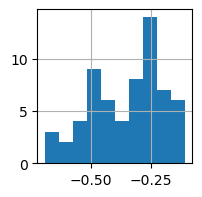

In [6]:
df["diff_seq_duration_per_time_and_vertex"].hist(figsize=(2, 2));

## Histograms

We write a function that can plot more sophisticated histograms, by grouping according to a given variable `by`.

In [35]:
import plotly.graph_objects as go


def hist_diff_seq_per_time_vertex_diameter_group(by="n_steps"):
    grouped_data = df.groupby(by)["diff_seq_per_time_vertex_diameter"]

    fig = go.Figure()

    for name, group in grouped_data:
        fig.add_trace(go.Histogram(x=group, opacity=0.5, name=f"{by} = {name}"))

    fig.update_layout(
        title=COL_TO_TEXT["diff_seq_per_time_vertex_diameter"],
        showlegend=True,
        width=600,  # Set the width of the figure to 500
        height=400,
    )

    fig.show()

In [36]:
hist_diff_seq_per_time_vertex_diameter_group(by="n_steps")

In [37]:
hist_diff_seq_per_time_vertex_diameter_group(by="n_vertices")

In [38]:
hist_diff_seq_per_time_vertex_diameter_group(by="noise_factor")

## Scatter plots

We write code to generate the main plot for the corresponding section of the paper.

In [55]:
import plotly.express as px
import plotly.io as pio

fontsize = 15


def diff_scatter_grouped(
    colored_by="noise_factor",
    marked_by="n_steps",
    diff_seq="relative_diff_seq_duration",
):
    x = df["diff_seq_per_time_vertex_diameter"] * 100
    y = np.abs(df[diff_seq]) / df["n_vertices"]
    value_to_symbol = dict(zip(df[marked_by].unique(), ["square", "x", "cross"]))

    fig = px.scatter(
        df,
        x=x,
        y=y,
        color=[str(c) for c in df[colored_by].values],
        color_discrete_sequence=px.colors.qualitative.Dark24,  # D3 #Dark24 # Pastel
        symbol=[s for s in df[marked_by].values],
        symbol_map=value_to_symbol,
    )

    fig.update_layout(
        xaxis_title=dict(
            text=COL_TO_TEXT["diff_seq_per_time_vertex_diameter"],
            font=dict(family="CMU", size=fontsize),
        ),
        yaxis_title=dict(
            text=COL_TO_TEXT[diff_seq], font=dict(family="CMU", size=fontsize)
        ),
        title_font=dict(family="CMU", size=fontsize),
        xaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        yaxis=dict(tickfont=dict(family="CMU", size=fontsize)),
        legend=dict(
            font=dict(family="CMU", size=fontsize), title=COL_TO_TEXT[colored_by]
        ),
        width=650,
        height=370,
    )

    fig.update_traces(marker=dict(size=9, opacity=0.9))
    pio.write_image(fig, f"line_vs_geodesic_colored_by_{colored_by}.svg")
    fig.show()

In [44]:
diff_scatter_grouped(colored_by="noise_factor", marked_by="n_steps")

In [56]:
diff_scatter_grouped(colored_by="n_vertices", marked_by="n_steps")